In [2]:
import pandas as pd

df = pd.read_csv("Coffe_sales.csv")


In [6]:
import numpy as np 
coffe_new = df.copy()
coffe_new["New Price"] = np.where(df["coffee_name"]=='Latte', 3.99, 0 )


In [7]:
coffe_new["Datetime"] = pd.to_datetime(coffe_new['Date'])


In [8]:
coffe_new["hour"] = pd.to_datetime(coffe_new["hour_of_day"], format='%H').dt.time
coffe_new["Time"] = pd.to_datetime(coffe_new["Time"]).dt.strftime("%H:%M")




C:\Users\Hype\AppData\Local\Temp\ipykernel_20064\1598034164.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffe_new["Time"] = pd.to_datetime(coffe_new["Time"]).dt.strftime("%H:%M")


In [9]:
df[df['coffee_name']=='Latte']['Month_name'].value_counts().reset_index()

,Month_name,count
0,Oct,120
1,Sep,94
2,Mar,92
3,Nov,68
4,Aug,58
5,Jul,56
6,Feb,54
7,May,50
8,Jun,50
9,Dec,47


In [10]:
main_data = df.groupby(['coffee_name','Weekday']).agg({'money': 'sum', 'hour_of_day': 'mean','coffee_name':'count'}).rename(columns={'coffee_name':'quantity'})

main_data



money  hour_of_day  quantity
coffee_name         Weekday                                
Americano           Fri      2736.58    13.219048       105
                    Mon      2422.12    12.946237        93
                    Sat      1789.28    13.898551        69
                    Sun      1188.28    13.434783        46
                    Thu      2123.82    13.451220        82
                    Tue      2109.62    13.111111        81
                    Wed      2280.56    12.534091        88
Americano with Milk Fri      3162.90    13.233010       103
                    Mon      3915.78    13.867188       128
                    Sat      3719.86    13.416667       120
                    Sun      3018.88    14.242424        99
                    Thu      3156.04    13.514563       103
                    Tue      4333.60    13.720280       143
                    Wed      3444.06    13.327434       113
Cappuccino          Fri      2223.00    14.322581        62
                    Mon      2557.58    14.422535        71
                    Sat      2492.92    14.855072        69
                    Sun      2488.50    14.200000        70
                    Thu      2748.62    15.805195        77
                    Tue      2256.80    15.126984        63
                    Wed      2671.72    15.540541        74
Cocoa               Fri      1865.40    13.788462        52
                    Mon      1205.06    15.441176        34
                    Sat       816.60    15.695652        23
                    Sun       849.42    14.708333        24
                    Thu       819.54    16.304348        23
                    Tue      2035.38    15.421053        57
                    Wed       929.76    16.807692        26
Cortado             Fri       966.40    12.081081        37
                    Mon       918.40    11.771429        35
                    Sat      1418.48    11.803571        56
                    Sun      1074.64    13.000000        42
                    Thu      1069.74    13.952381        42
                    Tue      1132.44    12.454545        44
                    Wed       804.76    13.903226        31
Espresso            Fri       440.30    13.619048        21
                    Mon       209.62    13.900000        10
                    Sat       270.34    11.785714        14
                    Sun       341.86    13.500000        16
                    Thu       563.72    13.925926        27
                    Tue       327.16    13.375000        16
                    Wed       537.28    14.360000        25
Hot Chocolate       Fri      1612.14    16.422222        45
                    Mon      1246.70    15.000000        35
                    Sat       869.02    14.416667        24
                    Sun      1445.10    17.200000        40
                    Thu      1727.26    17.062500        48
                    Tue      1765.96    17.142857        49
                    Wed      1267.28    15.657143        35
Latte               Fri      3795.94    14.280374       107
                    Mon      4887.84    14.601449       138
                    Sat      3357.02    14.926316        95
                    Sun      2929.38    14.365854        82
                    Thu      3882.66    15.287037       108
                    Tue      4207.42    14.302521       119
                    Wed      3815.04    14.638889       108

In [11]:
pivot =df.pivot_table(columns='coffee_name',index='Weekday', values='money')
pivot

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
Weekday,,,,,,,,
Fri,26.062667,30.707767,35.854839,35.873077,26.118919,20.966667,35.825333,35.476075
Mon,26.044301,30.592031,36.022254,35.442941,26.240000,20.962000,35.620000,35.419130
Sat,25.931594,30.998833,36.129275,35.504348,25.330000,19.310000,36.209167,35.337053
Sun,25.832174,30.493737,35.550000,35.392500,25.586667,21.366250,36.127500,35.724146
Thu,25.900244,30.641165,35.696364,35.632174,25.470000,20.878519,35.984583,35.950556
Tue,26.044691,30.304895,35.822222,35.708421,25.737273,20.447500,36.040000,35.356471
Wed,25.915455,30.478407,36.104324,35.760000,25.960000,21.491200,36.208000,35.324444


In [12]:
pivot.sum(axis=1)

Weekday
Fri    246.885343
Mon    246.342657
Sat    244.750270
Sun    246.072974
Thu    246.153604
Tue    245.461473
Wed    247.241830
dtype: float64

In [13]:
# Banyak Penjualan Per Produk 
group = df.groupby('coffee_name')['money'].sum().reset_index()
total_row = pd.DataFrame({
    'coffee_name': ['Total'],
    'money': [group['money'].sum()]
})
mean_row = pd.DataFrame({
    'coffee_name':['mean'],
    'money': [group['money'].mean()]
})
result = pd.concat([group, total_row,mean_row], ignore_index=True)
result

,coffee_name,money
0,Americano,14650.2600
1,Americano with Milk,24751.1200
2,Cappuccino,17439.1400
3,Cocoa,8521.1600
4,Cortado,7384.8600
5,Espresso,2690.2800
6,Hot Chocolate,9933.4600
7,Latte,26875.3000
8,Total,112245.5800
9,mean,14030.6975


In [14]:
# JUMLAH PENJUALAN TIAP HARI
quantity =  df.groupby('coffee_name')['coffee_name'].count()
quantity_weekday = df.groupby('Weekday')['coffee_name'].count()
quantity_weekday


Weekday
Fri    532
Mon    544
Sat    470
Sun    419
Thu    510
Tue    572
Wed    500
Name: coffee_name, dtype: int64

<Axes: title={'center': 'Total top 3 coffee sales'}, xlabel='Month_name'>

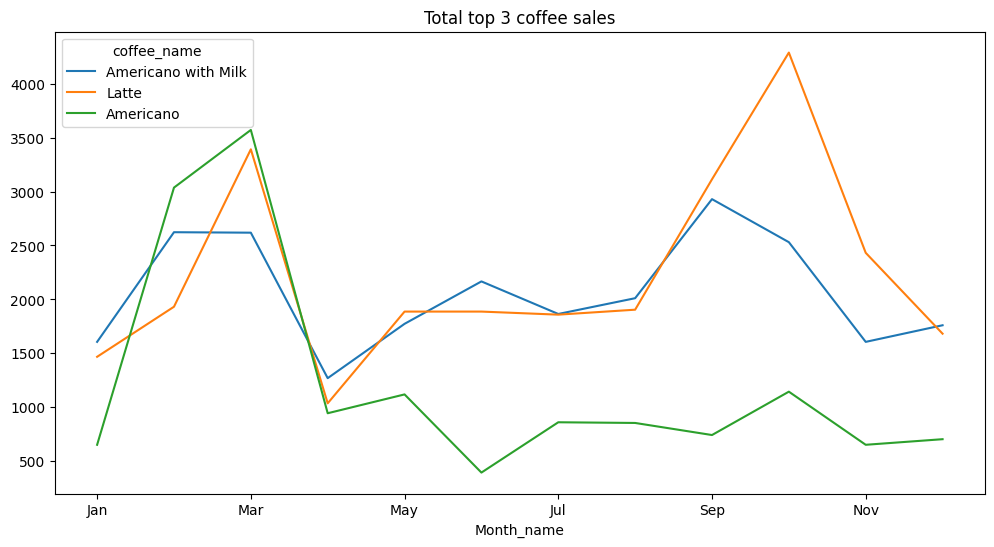

In [47]:


df_pivot = df.pivot_table(
    columns='coffee_name',
    index='Month_name',
    values='money',
    aggfunc='sum',
)
df_pivot.reset_index(inplace=True)
df_pivot['month_number'] = pd.to_datetime(df_pivot['Month_name'], format='%b').dt.month
df_pivot.sort_values('month_number', inplace=True)
df_pivot.set_index('Month_name', inplace=True)
df_pivot.drop('month_number', axis=1, inplace=True)

top_3 = df['coffee_name'].value_counts().head(3).index.tolist()

df_pivot[top_3].plot(kind='line', figsize=(12,6), title='Total top 3 coffee sales')

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

df.sample()



,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
391,15,card,37.72,Latte,Afternoon,Sun,May,7,5,2024-05-12,15:16:19.815000


In [ ]:
df_capucino = df[df['coffee_name']=="Cappuccino"].copy()
df_capucino = df_capucino.pivot_table(
    columns='coffee_name',
    index='Month_name',
    values='money',
    aggfunc='sum',
)
df_capucino.reset_index(inplace= True)
df_capucino['month_num'] = pd.to_datetime(df_capucino['Month_name'], format='%b').dt.month
df_capucino.sort_values('month_num', inplace=True)
df_capucino.drop('month_num', axis=1, inplace=True)
df_capucino

<Axes: title={'center': 'Total Sales per Coffee Type in February'}, xlabel='coffee_name'>

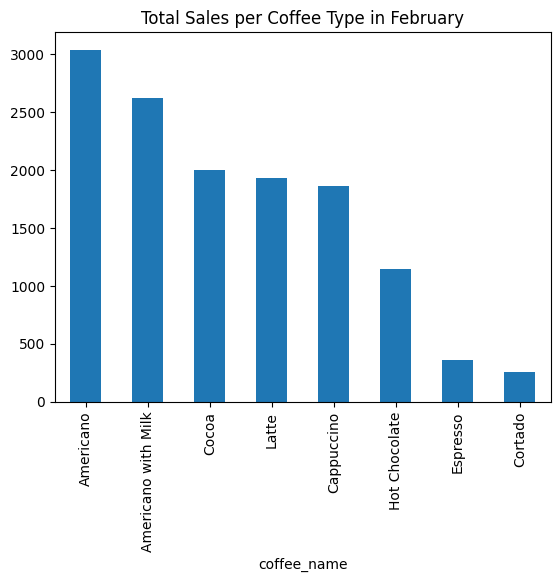

In [36]:
df_feb = df[df['Month_name']=="Feb"]
df_february = (
    df_feb
    .groupby('coffee_name')['money']
    .sum()
    .sort_values(ascending=False)
)
df_february.plot(kind='bar', title='Total Sales per Coffee Type in February')
